# Pymaceuticals Inc.


In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import scipy.stats as st
from scipy.stats import linregress

%matplotlib notebook

In [2]:
# Read the mouse data

mouse_metadata = "data/Mouse_metadata.csv"
mouse_metadata = pd.read_csv(mouse_metadata)

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Read the the study results

study_results = "data/Study_results.csv"
study_results = pd.read_csv(study_results)

study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset

Complete_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
Complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [5]:
# Generate a summary statistics table of 
# mean, median, variance, standard deviation, and SEM 
# of the tumor volume for each regimen

Mean_TumorVolume = Complete_data.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]

Median_TumorVolume = Complete_data.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]

Var_TumorVolume = Complete_data.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]

SD_TumorVolume = Complete_data.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]

SEM_TumorVolume = Complete_data.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]


In [6]:
# Create a DataFrame for Statistics Summary

Summary_stats = pd.DataFrame({"Mean Tumor Volume" : Mean_TumorVolume,
                              "Median Tumor Volume" : Median_TumorVolume,
                              "Variance Tumor Volume" : Var_TumorVolume,
                              "Standard Deviation" : SD_TumorVolume,
                              "SEM Tumor Volume" : SEM_TumorVolume
                             })

Summary_stats = Summary_stats.reset_index().sort_values('Mean Tumor Volume')

Summary_stats

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation,SEM Tumor Volume
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860


## Bar plots

In [7]:
# Create a DataFrame to find the Drug Count

drug_count = Complete_data['Drug Regimen'].value_counts()
drug_count = pd.DataFrame(drug_count)
drug_count

,Drug Regimen
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Ceftamin,178
Infubinol,178
Propriva,161


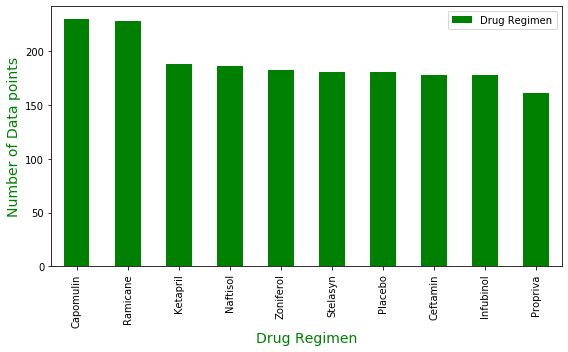

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

drug_chart = drug_count.plot(kind = 'bar', color = 'g', figsize = (8,5))

drug_chart.set_xlabel("Drug Regimen", fontsize = 14, color = 'g')
drug_chart.set_ylabel("Number of Data points", fontsize = 14, color = 'g')

plt.tight_layout()
plt.show()

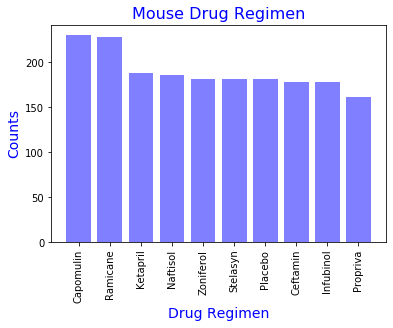

<Figure size 1440x360 with 0 Axes>

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

plt.bar(drug_count.index, drug_count['Drug Regimen'], color='b', alpha=0.5, align="center")

plt.xlabel("Drug Regimen", fontsize = 14, color = 'b')
plt.ylabel("Counts", fontsize = 14, color = 'b')
plt.title("Mouse Drug Regimen", fontsize = 16, color = 'b')

plt.xticks(rotation = "vertical")

plt.figure(figsize=(20,5))

plt.tight_layout()
plt.show()

## Pie plots

In [10]:
#Find the Gender count of mice

gender_count = pd.DataFrame(mouse_metadata["Sex"].value_counts())
gender_count

,Sex
Male,125
Female,124


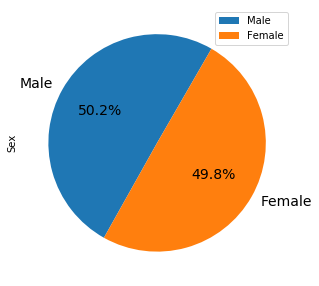

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_count.plot(kind = 'pie',
                  subplots = True,
                  autopct='%1.1f%%',
                  startangle = 60,
                  figsize=(5, 5),
                  fontsize=14
                 )
plt.show()

Text(0.5, 1.0, 'Gender Count')

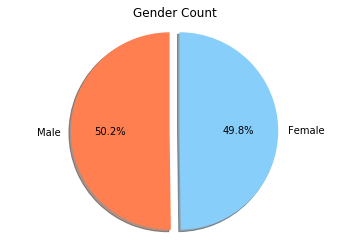

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_count["Sex"], 
        labels = gender_count.index, 
        colors = ["coral", "lightskyblue"],
        explode = (0.1, 0),
        autopct="%1.1f%%", 
        startangle=90,
        shadow=True)

plt.axis("equal")
plt.title("Gender Count")

## Quartiles, outliers and boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [14]:
# Start by getting the last (greatest) timepoint for each mouse

promising_drug_data = Complete_data.groupby(["Mouse ID"]).max()["Timepoint"]
promising_drug_data = promising_drug_data.reset_index()
promising_drug_data


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [15]:
# Merge this dataframe with the original dataframe to get the tumor volume at the last timepoint

promising_drug_data = pd.merge( promising_drug_data[["Mouse ID","Timepoint"]],
                                Complete_data[["Mouse ID", "Timepoint", "Drug Regimen", "Tumor Volume (mm3)"]],
                                on = ["Mouse ID","Timepoint"],
                                how = "left"
                              )
                                                                          
# Sort columns Tumor Volume (mm3) and Timepoint  
                                                                          
promising_drug_data = promising_drug_data.sort_values(["Tumor Volume (mm3)","Mouse ID"])

promising_drug_data

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
97,k403,45,Ramicane,22.050126
175,s185,45,Capomulin,23.343598
122,m601,45,Capomulin,28.430964
227,x401,45,Capomulin,28.484033
70,g791,45,Ramicane,29.128472
...,...,...,...,...
187,t724,45,Naftisol,75.113288
118,m269,45,Stelasyn,75.123690
148,p189,45,Ketapril,75.294936
113,l725,45,Naftisol,76.668817


##  _The most promising treatment regimens from the above tables are:_
1. Capomulin	
2. Ramicane
3. Infubinol
4. Ceftamin

In [16]:
Capomulin_data = promising_drug_data.loc[promising_drug_data["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
Ramicane_data = promising_drug_data.loc[promising_drug_data["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
Infubinol_data = promising_drug_data.loc[promising_drug_data["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
Ceftamin_data = promising_drug_data.loc[promising_drug_data["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]

In [17]:
drug_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drugs_data = [Capomulin_data, Ramicane_data, Infubinol_data, Ceftamin_data]

x = 0

for drug in drugs_data:
    
    quartiles = drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = drug.loc[(drug < lower_bound) | (drug > upper_bound)]
                
    print(f"The potential outliers for {drug_names[x]} are: {outliers}\n")

    x = x + 1

The potential outliers for Capomulin are: Series([], Name: Tumor Volume (mm3), dtype: float64)

The potential outliers for Ramicane are: Series([], Name: Tumor Volume (mm3), dtype: float64)

The potential outliers for Infubinol are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

The potential outliers for Ceftamin are: Series([], Name: Tumor Volume (mm3), dtype: float64)



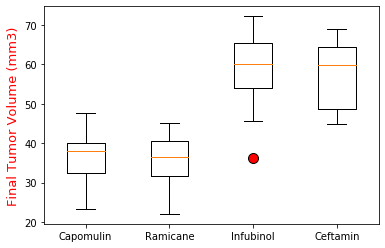

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(
            [Capomulin_data, Ramicane_data, Infubinol_data, Ceftamin_data],
            labels = ['Capomulin','Ramicane','Infubinol','Ceftamin'],
            flierprops = dict(markerfacecolor = "red", markersize = 10)
           )

plt.ylabel('Final Tumor Volume (mm3)', color = 'r', fontsize = 13)

plt.show()

## Line and scatter plots

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Capomulin_df = Complete_data.loc[Complete_data['Drug Regimen'] == "Capomulin"]
# Data for Mouse ID "i557"

Mouse_i557_Capomulin_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == "i557"]

Mouse_i557_Capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
431,i557,Capomulin,Female,1,24,0,45.000000,0
432,i557,Capomulin,Female,1,24,5,42.261665,0
433,i557,Capomulin,Female,1,24,10,42.992077,0
434,i557,Capomulin,Female,1,24,15,43.529876,0
435,i557,Capomulin,Female,1,24,20,43.967895,0
436,i557,Capomulin,Female,1,24,25,44.596219,0
437,i557,Capomulin,Female,1,24,30,45.261384,0
438,i557,Capomulin,Female,1,24,35,45.941949,0
439,i557,Capomulin,Female,1,24,40,46.821070,1
440,i557,Capomulin,Female,1,24,45,47.685963,1


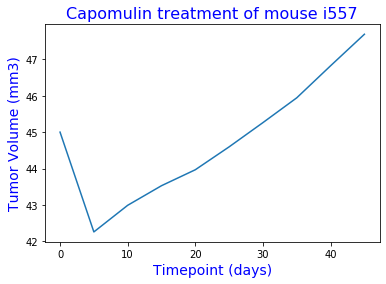

In [20]:
plt.plot(Mouse_i557_Capomulin_df["Timepoint"], Mouse_i557_Capomulin_df["Tumor Volume (mm3)"])
plt.xlabel('Timepoint (days)', color = 'b', fontsize = 14)
plt.ylabel('Tumor Volume (mm3)', color = 'b', fontsize = 14)
plt.title('Capomulin treatment of mouse i557', color = 'b', fontsize = 16)
plt.show()

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Capomulin_df = Complete_data.loc[Complete_data['Drug Regimen'] == "Capomulin"]
Capomulin_avg_df = pd.DataFrame(Capomulin_df.groupby(["Mouse ID","Weight (g)"]).mean()['Tumor Volume (mm3)'])

Capomulin_avg_df = Capomulin_avg_df.reset_index()
Capomulin_avg_df

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


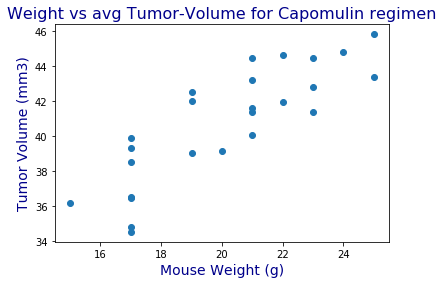

In [22]:
plt.scatter(Capomulin_avg_df["Weight (g)"], Capomulin_avg_df["Tumor Volume (mm3)"])

plt.xlabel('Mouse Weight (g)', color = 'darkblue', fontsize = 14)
plt.ylabel('Tumor Volume (mm3)', color = 'darkblue', fontsize = 14)
plt.title('Weight vs avg Tumor-Volume for Capomulin regimen', color = 'darkblue', fontsize = 16)

plt.show()

In [23]:
# Calculate the correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen 

x_values = Capomulin_avg_df["Weight (g)"]
y_values =  Capomulin_avg_df["Tumor Volume (mm3)"]

correlation = st.pearsonr(x_values,y_values)

print(f'\nThe correlation coefficient between mouse weight and the average tumor volume for the Capomulin regimen is {round(correlation[0],2)}\n')



The correlation coefficient between mouse weight and the average tumor volume for the Capomulin regimen is 0.84



y = 0.95x + 21.55


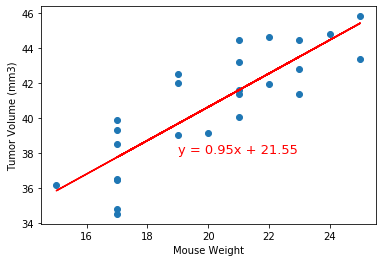

In [24]:
# Add the linear regression equation and line to plot

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

print(line_eq)

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, xy = (19, 38), fontsize = 13, color = "red")

plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume (mm3)')

plt.show()